"The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others." (Kaggle competition Titanic Dataset)



**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In this project I will be making use of Logistic Regression, Decision trees, and Random Tree Classifier as predictive models to evaluate what group of persons were more likely to survive using passenger data. Based on the best accuracy, we will employ the best model on a random passenger to see if he would survive the tragic event.


Let's begin!

In [365]:
import numpy as np 
import pandas as pd 

In [366]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [367]:
titan_train= pd.read_csv("C:\\Users\\javel\\Downloads\\titanic_train.csv")
titan_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [368]:
titan_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


EDA

In [369]:
titan_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

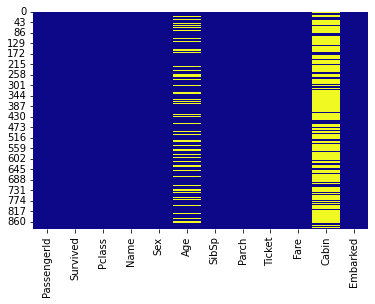

In [370]:
sns.heatmap(titan_train.isnull(),cbar=False,cmap='plasma')
#From this plot we see that age and cabin columns have missing data 

In [371]:
# We need to determine the percentage nulls in order to evaluate what to impute and what to discard
Null_percent_age=titan_train['Age'].isnull().sum()/len(titan_train['Age'])*100
Null_percent_cabin=titan_train['Cabin'].isnull().sum()/len(titan_train['Cabin'])*100
Null_percent_embark=titan_train['Embarked'].isnull().sum()/len(titan_train['Embarked'])*100
print("null precentage cabin =",Null_percent_cabin,"%")
print("null precentage age =",Null_percent_age,"%")
print("null precentage embark =",Null_percent_embark,"%")

null precentage cabin = 77.10437710437711 %
null precentage age = 19.865319865319865 %
null precentage embark = 0.22446689113355783 %


In [372]:
# number of persons who survived
titan_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

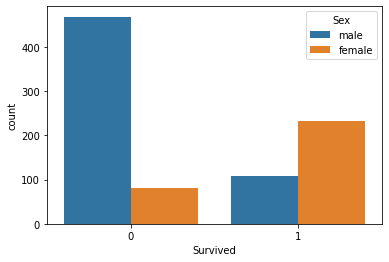

In [373]:
#Countplot of passengers who survived(1) and passengers who didn't(0) by sex
sns.set_style=('Whitegrid')
sns.countplot(x='Survived',hue='Sex', data=titan_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

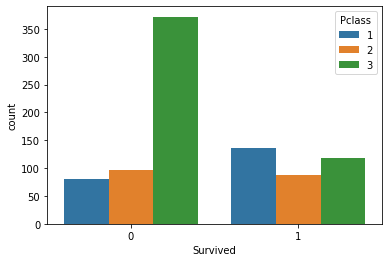

In [374]:
#Countplot of passengers who survived(1) and passengers who didn't(0) by Pclass
sns.countplot(x='Survived',hue='Pclass', data=titan_train)

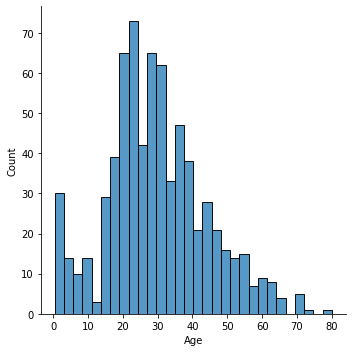

In [375]:
#Distplot of Age ranges on titanic
sns.displot(titan_train["Age"].dropna(),kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

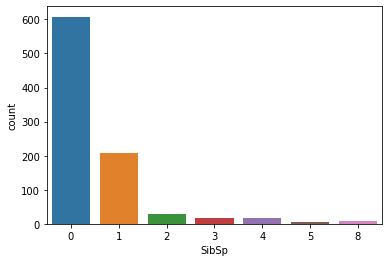

In [376]:
#Countplot of the number of sibling and spouses of titanic patrons
sns.countplot(x='SibSp', data=titan_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

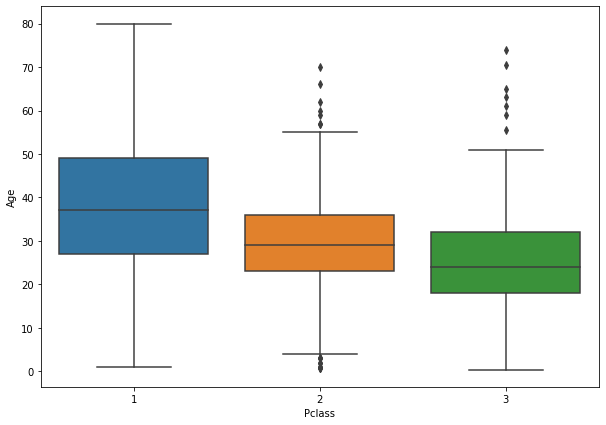

In [377]:
#Boxplot of age ranges per Pclass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y="Age",data=titan_train)

IMPUTING MISSING VALUES FOR AGE COLUMN WITH MEANS


In [378]:
#From the Age display and Null percentage calculation, we see that the age column can be imputed since only 20% of data is missing
def impute_age(cols):
    # sourcery skip: remove-unnecessary-else, swap-if-else-branches, switch
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
    


In [379]:
titan_train['Age']=titan_train[['Age', 'Pclass']].apply(impute_age, axis=1)
titan_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

DROPPING CABIN COLUMN(TOO MANY MISSING VALUES ) AS WELL ANY OTHER MISSING DATA FROM EMBARKED

In [380]:
titan_train.drop('Cabin',axis=1, inplace=True)
titan_train.dropna(inplace=True)
titan_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


PREPARING DATA FOR TRAIN-TEST SPLIT

In [381]:
#Converting Categorical Features
sex = pd.get_dummies(titan_train['Sex'],drop_first=True)
embark = pd.get_dummies(titan_train['Embarked'],drop_first=True)

In [382]:
titan_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titan_train = pd.concat([titan_train,sex,embark],axis=1)

In [383]:
titan_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [384]:
titan_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male             uint8
Q                uint8
S                uint8
dtype: object

TRAIN_TEST SPLIT

In [385]:
X=titan_train.drop('Survived', axis=1).values
y=titan_train['Survived']

In [386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)


In [387]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

TRAIN USING LOGISTIC REGRESSION MODEL

In [388]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression(solver='lbfgs', max_iter=1000)
logR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

PREDICTIONS AND EVALUATIONS

In [389]:
predictions =logR.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       105
           1       0.70      0.60      0.65        73

    accuracy                           0.73       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



In [390]:
confusion_matrix(y_test,predictions)

array([[86, 19],
       [29, 44]], dtype=int64)

TRAIN USING DECISION TREES MODEL

In [391]:
from sklearn.tree import DecisionTreeClassifier

In [392]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)


DecisionTreeClassifier()

PREDICTIONS AND EVALUATIONS

In [393]:
predictions=dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.70      0.73        73

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [394]:
print(confusion_matrix(y_test,predictions))

[[90 15]
 [22 51]]


TRAIN USING RANDOM FOREST MODEL

In [395]:
from sklearn.ensemble import RandomForestClassifier

In [396]:
rfc= RandomForestClassifier(n_estimators=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

PREDICTIONS AND EVALUATIONS

In [397]:
predictions=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [398]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       105
           1       0.72      0.63      0.67        73

    accuracy                           0.75       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.74      0.75      0.74       178



In [399]:
print(confusion_matrix(y_test,predictions))

[[87 18]
 [27 46]]


In [400]:
# Printing the training accuracy for each model
print('Logistic Regression Training Accuracy: ', logR.score(X_train, y_train))
print('Decision Tree Training Accuracy: ', dtc.score(X_train, y_train))
print('Random Forest Training Accuracy: ', rfc.score(X_train, y_train))

Logistic Regression Training Accuracy:  0.8326300984528833
Decision Tree Training Accuracy:  1.0
Random Forest Training Accuracy:  0.9985935302390999


TEST DATA CHECKS

In [413]:
#SURVIVAL OF RANDOM PATRON USING THE MOST ACCURATE CLASSIFIER(RANDOM FOREST MODEL)
rand_patron1 =[[15, 2, 41, 7, 5, 0, 2, 1, 1]]


# Scaling rand_patron
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_rand_patron1 = sc.fit_transform(rand_patron1)

# Print prediction of patron
pred = rfc.predict(scaled_rand_patron1)

if pred == 1:
    print(pred,'You have lived to tell the tale!')
else:
    print(pred,'You did not survive.')

[0] You did not survive.
